# **Import the Libraries & Visualize the Data**

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
import sys
import math
import time
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
!pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 30.6MB 166kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
data  = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


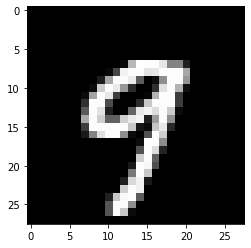

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[45],cmap = 'gray')
plt.show()

In [ ]:
print(x_train.shape)

(60000, 28, 28)


#**Extract the Features** 
1. First we will create the SIFT Object
2. Then we will Compute keypoints and Descriptors
3. We are keeping the threshold as the variable. Threshold value comes out to be 27. After that the accuracy becomes constant.

In [ ]:
def feature_extraction(x_train,y_train,threshold):
    Xtrain=[]
    ytrain=[]

    cnt = 0
    q=0
    for i in range(0,x_train.shape[0]):
        # create SIFT object
        sift = cv2.xfeatures2d.SIFT_create()
        
        # compute SIFT keypoints & descriptors for images
        kp, des = sift.detectAndCompute(x_train[i], None)#None for the mask

        
        ndes = 0
        
        q = q + 1
        if type(des)!=type(None) :
            for d in des:
                
                if ndes <= threshold: # threshold no. of SIFT keypoint vectors to include
                    Xtrain.append(d.astype(float))
                    ytrain.append(y_train[i])
                    ndes += 1
                else:
                    break


    # return data and label
    return Xtrain, ytrain


# **Fit the Model**
1. Here I am using SVM Polynomial Kernel to fit the Data.
2. Degree of Polynomial is set = 10 because of no. of Classes.

In [ ]:
def model_fit(Xtrain,ytrain):
    clf = svm.SVC(kernel = 'poly', C = 10, gamma =0.001,degree=10)
    clf.fit(Xtrain, ytrain)
    return clf





# **Test the Model**
1. After fitting the model we are testing on the Test Data.
2. We are calculating the accuracy by calculating the no. of Accurate Matches 

In [ ]:
def test_model(clf,x_test,y_test):
    sift = cv2.xfeatures2d.SIFT_create()
    accuracy = 0
    y_pred = []
    y_act = []
    for i in range(0,x_test.shape[0]):

        # compute SIFT keypoints & descriptors for images
        kp, des = sift.detectAndCompute(x_test[i], None)
        # predict labels for keypoints of test image
        if type(des)!=type(None):
            temp = clf.predict(des)
            pred = temp.astype(np.int64)
            

            # hash the labels assigned to keypoints & pick the label assigned to majority of the keypoints
            counts = np.bincount(pred)
            pred_label = np.argmax(counts)
            y_pred.append(pred_label)
            y_act.append(y_test[i])
            # map actual label to the integer assigned to it
            actual_label = y_test[i]

            # if ground truth is equal to the predicted label
            if actual_label == pred_label:
                accuracy +=1
            
    print("Total Correct Matches ",accuracy)
    return accuracy,y_pred,y_act        


# **Main Call to Run the Code**

In [ ]:
#Main Call
thresh = [i*3 for i in range(1,10) ]
Accuracy_metrics = []
time_metrics = []
confuse = []
for i in range(0,len(thresh)):
    print("Running for threshold =",thresh[i])
    # call 'datagen' function to get training and testing data & labels
    start_time = time.time()
    Xtrain,ytrain = feature_extraction(x_train,y_train,thresh[i])
    # convert all matrices to numpy array for fast computation
    Xtrain = np.array(Xtrain)
    ytrain = np.array(ytrain)
    print("Total Number of Training Params --> ", Xtrain.shape[0])

    clf = model_fit(Xtrain,ytrain)

    accuracy,y_pred,y_act = test_model(clf,x_test,y_test) 
    accuracy1 = (accuracy / len(y_act)) * 100
    print("Accuracy: %.2f" % accuracy1 + "%")
    Accuracy_metrics.append(accuracy1)
    
    print("Time Taken --- %s seconds" % (time.time() - start_time))
    print()
    time_metrics.append(time.time()-start_time)
    cm = confusion_matrix(y_act,y_pred)
    confuse.append(cm)

Running for threshold = 3
Total Number of Training Params -->  221393
Total Correct Matches  8281
Accuracy: 84.57%
Time Taken --- 607.640810251236 seconds

Running for threshold = 6
Total Number of Training Params -->  345526
Total Correct Matches  8426
Accuracy: 86.05%
Time Taken --- 639.9170517921448 seconds

Running for threshold = 9
Total Number of Training Params -->  421525
Total Correct Matches  8414
Accuracy: 85.93%
Time Taken --- 670.2402637004852 seconds

Running for threshold = 12
Total Number of Training Params -->  456122
Total Correct Matches  8385
Accuracy: 85.63%
Time Taken --- 653.3965878486633 seconds

Running for threshold = 15
Total Number of Training Params -->  466823
Total Correct Matches  8351
Accuracy: 85.28%
Time Taken --- 650.6873576641083 seconds

Running for threshold = 18
Total Number of Training Params -->  469084
Total Correct Matches  8362
Accuracy: 85.40%
Time Taken --- 659.9498746395111 seconds

Running for threshold = 21
Total Number of Training Para

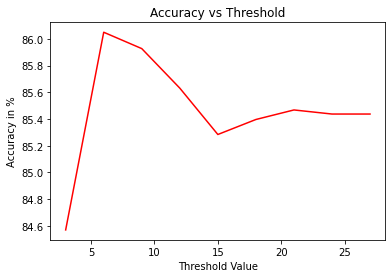

<Figure size 432x288 with 0 Axes>

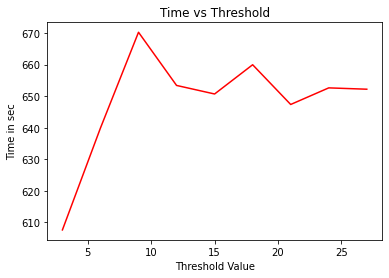

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot  ( thresh,Accuracy_metrics,color='r')
plt.ylabel('Accuracy in %')
plt.xlabel('Threshold Value')
plt.title ('Accuracy vs Threshold')
plt.show()






plt.plot (thresh,time_metrics,color='r')
plt.ylabel('Time in sec')
plt.xlabel('Threshold Value')
plt.title ('Time vs Threshold')
plt.figure()

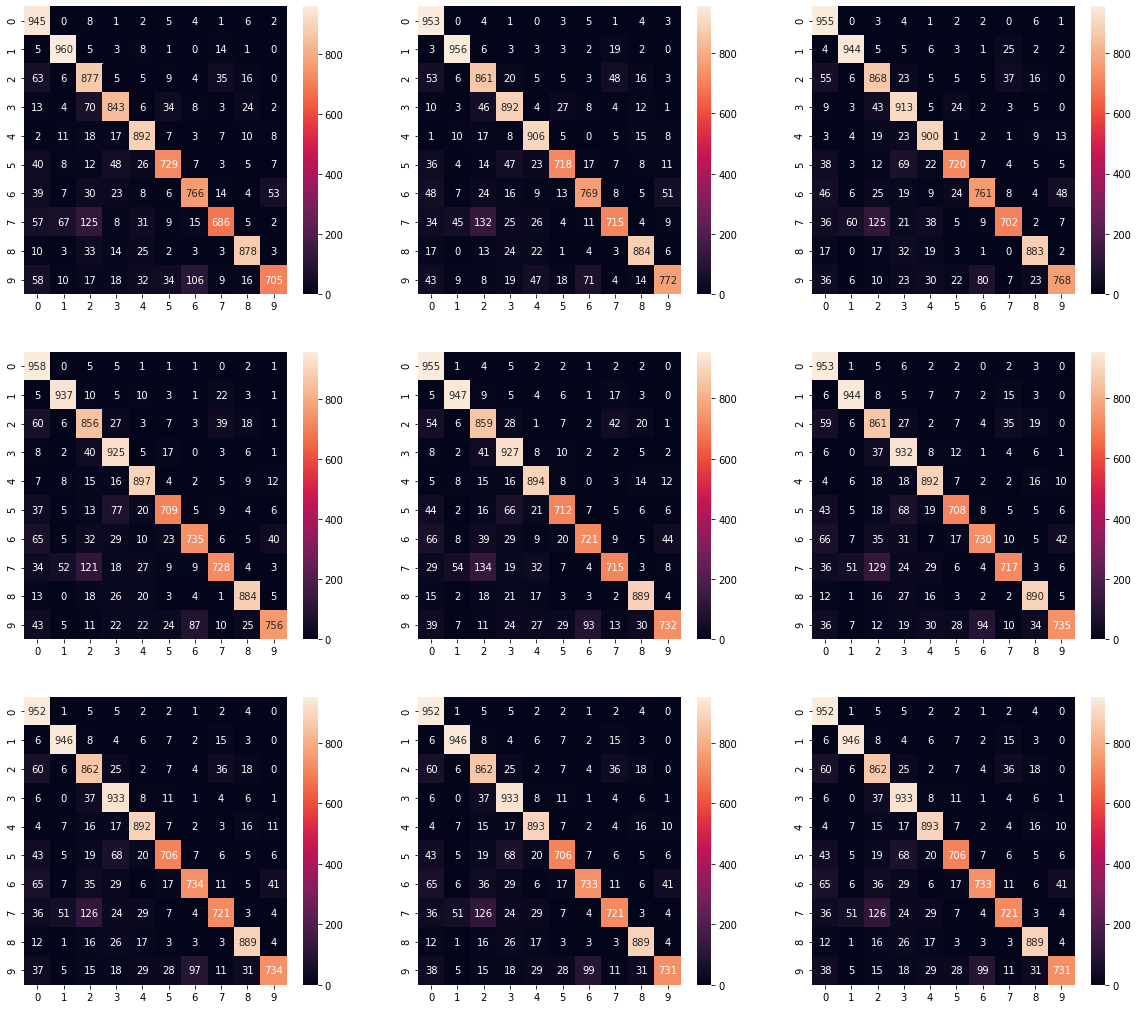

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(20,18))
for i in range(0,9):
    plt.subplot(3, 3, i+1)
    sns.heatmap(confuse[i],annot=True,fmt='g')
plt.figure()    
plt.show()
plt.savefig('Confuse_mat.png')